# Import libraries

In [68]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load prediction file

In [69]:
with open("../exps/thumos/actionformer_i3d/result_detection.json", "r") as f:
  predictions = json.load(f)

In [70]:
rows_predictions = []
for video_id, segments in predictions['results'].items():
  for s in segments:
    rows_predictions.append({
      'video_id': video_id,
      'start': s['segment'][0],
      'end': s['segment'][1],
      'label': s['label'],
      'score': s['score']
    })
  
predictions_df = pd.DataFrame(rows_predictions)
predictions_df.head()

,video_id,start,end,label,score
0,video_test_0000004,0.57,1.61,CricketShot,0.5349
1,video_test_0000004,20.60,21.86,CricketShot,0.5166
2,video_test_0000004,0.35,1.07,CricketBowling,0.4968
3,video_test_0000004,30.85,32.79,CricketShot,0.3264
4,video_test_0000004,21.35,22.03,CricketShot,0.3038


# Load ground truth

In [71]:
with open('../data/annotations/thumos_14_anno.json', 'r') as f:
  gt = json.load(f)

In [72]:
rows_gt = []
for video_id, info in gt['database'].items():
  for s in info['annotations']:
    rows_gt.append({
      'video_id': video_id,
      'start': s['segment'][0],
      'end': s['segment'][1],
      'label': s['label']
    })

gt_df = pd.DataFrame(rows_gt)
gt_df.head()

,video_id,start,end,label
0,video_validation_0000051,67.5,75.9,Billiards
1,video_validation_0000051,85.9,90.6,Billiards
2,video_validation_0000051,139.3,148.2,Billiards
3,video_validation_0000052,24.3,24.8,Billiards
4,video_validation_0000053,9.1,13.8,Billiards


In [73]:
gt_df['video_id'].unique().shape

(411,)

# Plot

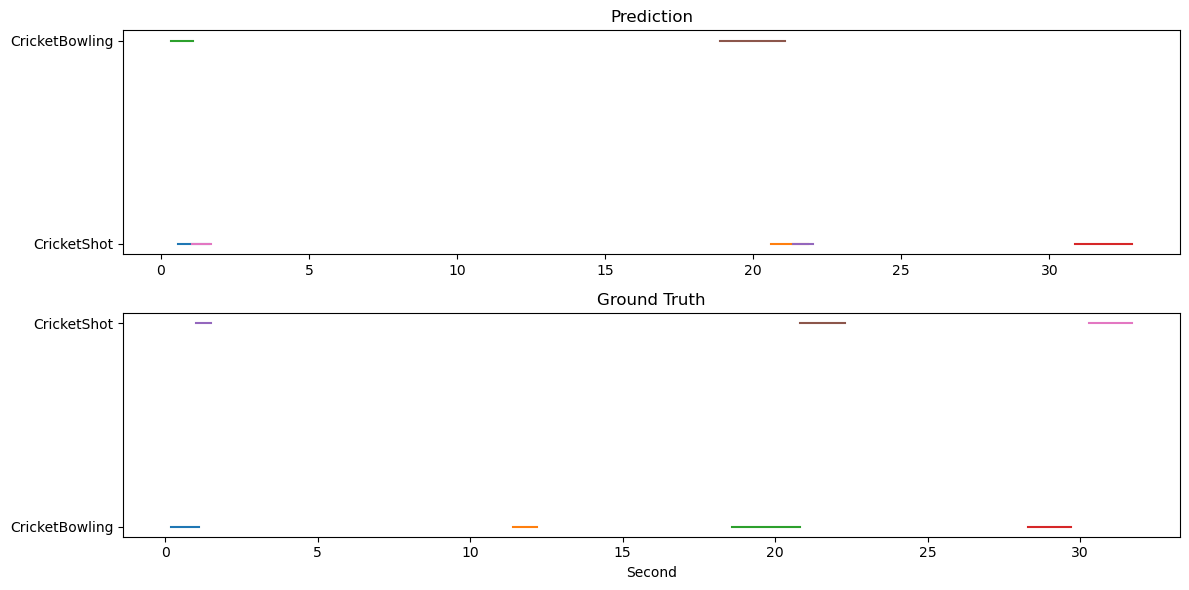

In [90]:
# Filter expected segments associated with a video
confidence_threshold = 0.2
predicted_video = predictions_df[(predictions_df['video_id'] == "video_test_0000004") & (predictions_df['score'] > confidence_threshold)]
# Filter expected segments associated with a video
video = gt_df[gt_df['video_id'] == "video_test_0000004"]

# Plot prediction for the video
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

for _, row in predicted_video.iterrows():
  ax[0].plot([row['start'], row['end']], [row['label']] * 2)
ax[0].set_title('Prediction') 
  
for _, row in video.iterrows():
  ax[1].plot([row['start'], row['end']], [row['label']] * 2)
ax[1].set_title('Ground Truth')

plt.xlabel('Second')
plt.tight_layout()
plt.show()